<a href="https://colab.research.google.com/github/Debasmita-Halder/tutorial-1/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

Accuracy :73.03%
Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



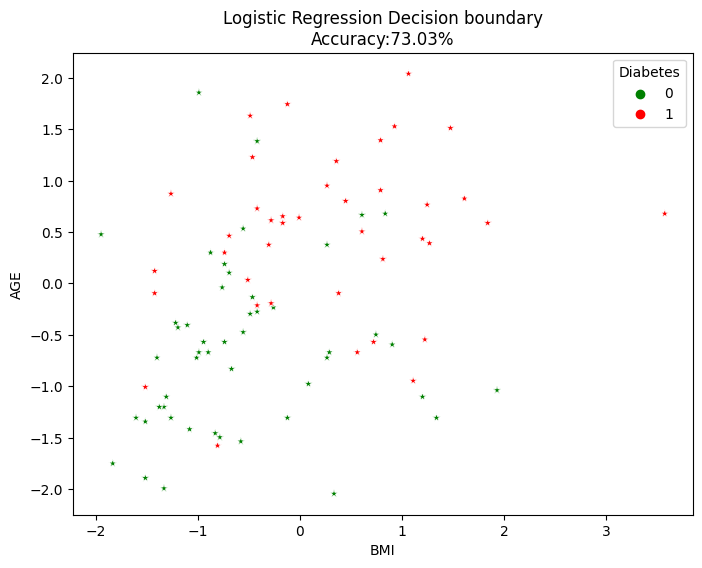

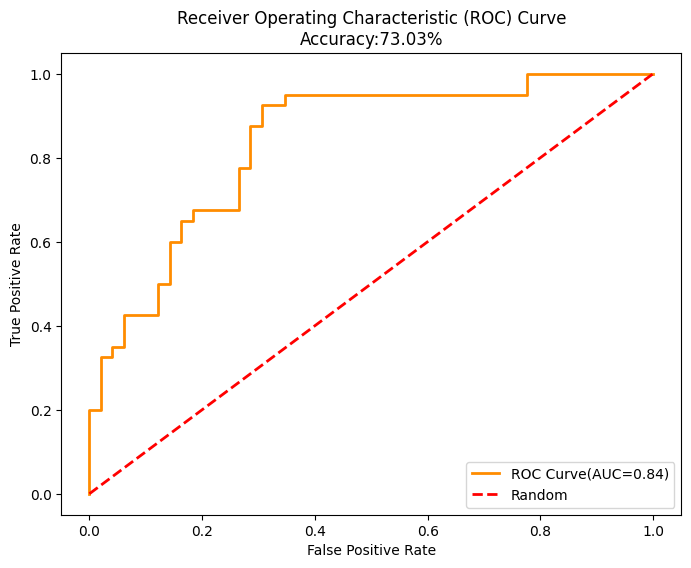

In [ ]:
diabetes=load_diabetes()
X,y=diabetes.data,diabetes.target
y_binary=(y > np.median(y)).astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y_binary,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :{:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:,2],y=X_test[:,8],hue=y_test,palette={0:'green',1:'red'},marker="*")
plt.xlabel("BMI")
plt.ylabel("AGE")
plt.title("Logistic Regression Decision boundary\nAccuracy:{:.2f}%".format(accuracy*100))
plt.legend(title="Diabetes",loc="upper right")
plt.show()

#plot ROC curve
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="darkorange",lw=2,label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--',label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy:{:.2f}%'.format(accuracy*100))
plt.legend(loc="lower right")
plt.show()